# DSLabs functions

In [14]:
%run "scripts/dslabs_functions.py"


# Data functions

In [15]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [16]:
import pandas as pd
import numpy as np




file_tag = "Google Merch Store 2024-2025"



# test_data=True
test_data=False


filepath=r'data/df_merch_0_2024_agg_time_diff_input.csv'


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.9

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2024-01-05 to 2025-03-05
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seven-day active users           426 non-null    float64
 1   28-day active users              426 non-null    float64
 2   Events per session               426 non-null    float64
 3   Average purchase revenue         426 non-null    float64
 4   Purchase revenue                 426 non-null    float64
 5   Average session duration         426 non-null    float64
 6   ARPU                             426 non-null    float64
 7   ARPPU                            426 non-null    float64
 8   Views per user                   426 non-null    float64
 9   Promotion clicks                 426 non-null    float64
 10  Sessions Mobile                  426 non-null    float64
 11  Seven-day active users Mobile    426 non-null    float64
 12  28-

# No Smoothing

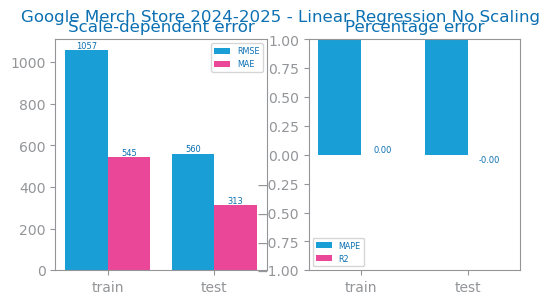

In [17]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_smoothing.png")

## no smoothing plot

<Axes: xlabel='Date', ylabel='Sessions'>

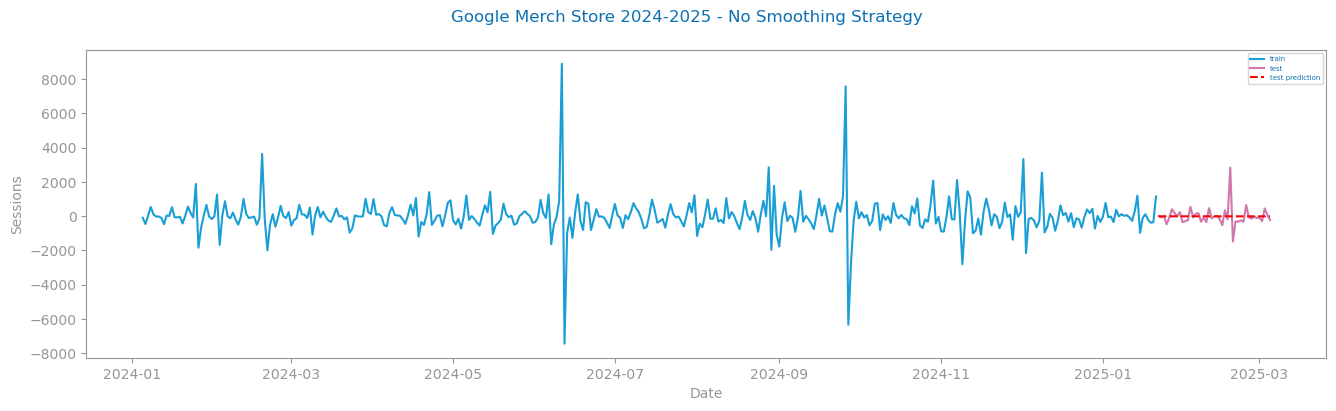

In [18]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Smoothing

## Smoothing strategy Application

In [19]:

def apply_strategy_1(df):

    data_copy=df.copy()
    

    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    
    WIN_SIZE = 10
    
    #smoothing over the training data
    train_smoothed=train.rolling(window=WIN_SIZE).mean().dropna()

    return train_smoothed, test



train_1,test_1=apply_strategy_1(data)

print(train_1.info())

print(test_1.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 2024-01-14 to 2025-01-21
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seven-day active users           374 non-null    float64
 1   28-day active users              374 non-null    float64
 2   Events per session               374 non-null    float64
 3   Average purchase revenue         374 non-null    float64
 4   Purchase revenue                 374 non-null    float64
 5   Average session duration         374 non-null    float64
 6   ARPU                             374 non-null    float64
 7   ARPPU                            374 non-null    float64
 8   Views per user                   374 non-null    float64
 9   Promotion clicks                 374 non-null    float64
 10  Sessions Mobile                  374 non-null    float64
 11  Seven-day active users Mobile    374 non-null    float64
 12  28-

## Smoothing Application evaluate

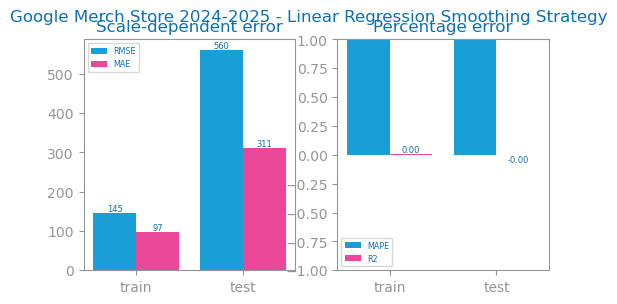

In [20]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets ------------------> ALREADY SPLIT IN THE STRATEGY FUNCTION
# train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Prepare the training and testing data from dataframes with features and target
# trnX_1 = train_1.drop(columns=[target])
# trnY_1 = train_1[target]
# tstX_1 = test_1.drop(columns=[target])
# tstY_1 = test_1[target]


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(train_1+test_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Smoothing Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_smoothing.png")

## Smoothing Plot

<Axes: xlabel='Date', ylabel='Sessions'>

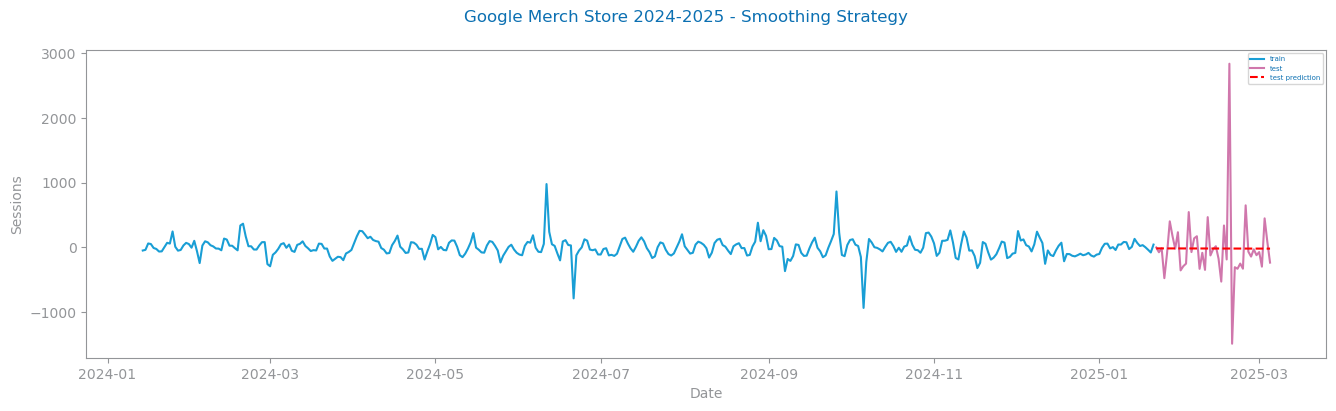

In [21]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Smoothing", "Smoothing"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

          Model         MAE            MSE        RMSE        R²          MAPE
0  No Smoothing  312.562462  313313.023221  559.743712 -0.000026  2.163271e+11
1     Smoothing  310.631921  313319.752841  559.749723 -0.000048  3.349450e+11


# save to csv

In [24]:
if test_data==False:
    

    data_save=data.copy()

    # if no smoothing was applied, the train and test data are the same
    data_copy=pd.read_csv(filepath)     
    train_save, test_save = series_train_test_split(data_copy, trn_pct=test_split_threshold)


    # apply smoothing strategy
    # train_save,test_save=apply_strategy_1(data)
    # train_save.reset_index(inplace=True) # only if smoothing applied
    # test_save.reset_index(inplace=True) # only if smoothing applied


    train_save.to_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", index=False)
  
    

    test_save.to_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", index=False)
          

    print(train_save.columns)
    print(test_save.columns)

Index(['Date', 'Seven-day active users', '28-day active users',
       'Events per session', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Promotion clicks', 'Sessions Mobile', 'Seven-day active users Mobile',
       '28-day active users Mobile', 'New users Mobile',
       'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile',
       'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sessions other', 'Sessions referral', 'season', 'commercial_season',
       'week_of_month', 'day_of_week_nr', '